In [30]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest

data=pd.read_csv('Crypto_historical_data.csv')
target_crypto=['Bitcoin', 'Ethereum', 'Litecoin']
data=data[data['name'].isin(target_crypto)]
print(data['name'].unique())
print(data)


['Ethereum' 'Bitcoin' 'Litecoin']
                            Date        Open        High         Low  \
0      2017-11-09 00:00:00+00:00  308.644989  329.451996  307.056000   
1      2017-11-10 00:00:00+00:00  320.670990  324.717987  294.541992   
2      2017-11-11 00:00:00+00:00  298.585999  319.453003  298.191986   
3      2017-11-12 00:00:00+00:00  314.690002  319.153015  298.513000   
4      2017-11-13 00:00:00+00:00  307.024994  328.415009  307.024994   
...                          ...         ...         ...         ...   
67702  2025-12-05 00:00:00+00:00   83.566628   84.104477   79.832222   
67703  2025-12-06 00:00:00+00:00   80.490448   82.456062   80.000427   
67704  2025-12-07 00:00:00+00:00   81.702011   83.647766   80.030922   
67705  2025-12-08 00:00:00+00:00   81.424095   84.363342   81.150002   
67706  2025-12-10 00:00:00+00:00   86.096802   86.096802   84.345825   

            Close      Volume   ticker      name  
0      320.884003   893249984  ETH-USD  Ethereum  

In [31]:
date_col = 'Date'
non_numeric_cols = ['ticker', 'name']  
numeric_cols = ['Open', 'High', 'Low', 'Close', 'Volume']  
numeric_data = data[numeric_cols].copy() 
non_numeric_data = data[non_numeric_cols + [date_col]].copy()  
clear_numeric = numeric_data.copy()

for i in range(len(numeric_cols)):
    col = numeric_cols[i]  
    q1 = numeric_data[col].quantile(0.25)
    q3 = numeric_data[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    mask = (numeric_data[col] >= lower_bound) & (numeric_data[col] <= upper_bound)
    clear_numeric = clear_numeric[mask]
remaining_indices = clear_numeric.index
clear_non_numeric = non_numeric_data.loc[remaining_indices].reset_index(drop=True)
clear_numeric = clear_numeric.reset_index(drop=True)
clear_combined = pd.concat([clear_non_numeric, clear_numeric], axis=1)
clear_combined = clear_combined.dropna()


df_clean=clear_combined
final_columns_order = [date_col] + numeric_cols + non_numeric_cols
df_clean = df_clean[final_columns_order]

print(df_clean['name'].unique())

['Ethereum' 'Bitcoin' 'Litecoin']


C:\Users\Денис\AppData\Local\Temp\ipykernel_4484\2197528434.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clear_numeric = clear_numeric[mask]
C:\Users\Денис\AppData\Local\Temp\ipykernel_4484\2197528434.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clear_numeric = clear_numeric[mask]
C:\Users\Денис\AppData\Local\Temp\ipykernel_4484\2197528434.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clear_numeric = clear_numeric[mask]
C:\Users\Денис\AppData\Local\Temp\ipykernel_4484\2197528434.py:16: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clear_numeric = clear_numeric[mask]



Матрица корреляции:
ticker   BTC-USD   ETH-USD   LTC-USD
ticker                              
BTC-USD  1.00000  0.458500  0.794880
ETH-USD  0.45850  1.000000  0.395623
LTC-USD  0.79488  0.395623  1.000000


<Axes: xlabel='ticker', ylabel='ticker'>

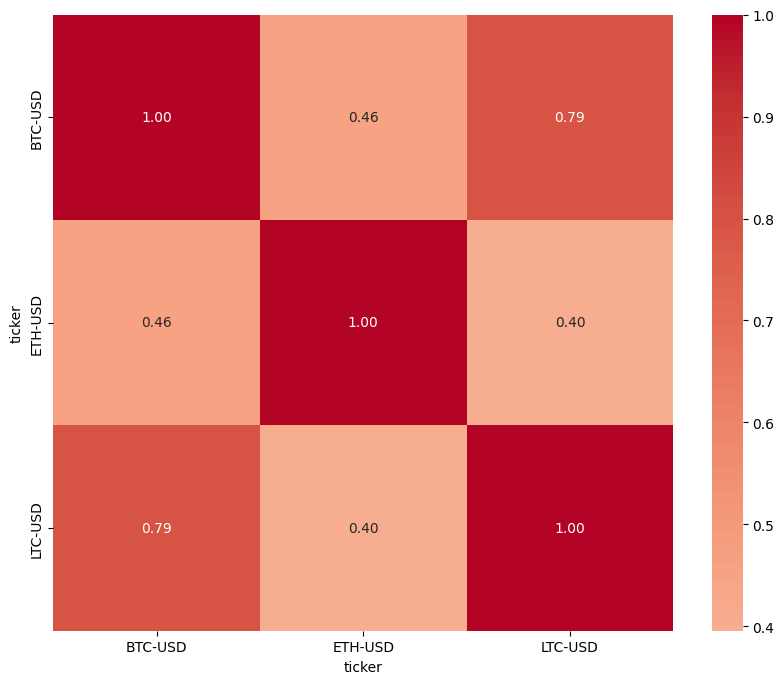

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap

pivot_data = df_clean.pivot(index='Date', columns='ticker', values='Close')
correlation_matrix = pivot_data.corr()
print("\nМатрица корреляции:")
print(correlation_matrix)
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix,
            annot=True,  # Включаем подписи значений
            fmt='.2f',   # Формат чисел (2 знака после запятой)
            cmap='coolwarm',
            center=0
            )
